In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
plt.style.use('seaborn')

filepath = os.path.join("raw_data", "team_game_level_data.csv")
team_game_df = pd.read_csv(filepath)
team_game_df.head()

,game_id,date,round,region,seed,team,score,opponent_seed,opponent,opponent_score,overtime,score_diff,win,seed_id
0,0,1985-03-14,Round of 64,East,1,Georgetown,68,16,Lehigh,43,NaN,25,1,1_16_fav
1,0,1985-03-14,Round of 64,East,16,Lehigh,43,1,Georgetown,68,NaN,-25,0,1_16_dog
2,1,1985-03-14,Round of 64,East,4,"Loyola, Illinois",59,13,Iona,58,NaN,1,1,4_13_fav
3,1,1985-03-14,Round of 64,East,13,Iona,58,4,"Loyola, Illinois",59,NaN,-1,0,4_13_dog
4,2,1985-03-14,Round of 64,East,5,Southern Methodist,85,12,Old Dominion,68,NaN,17,1,5_12_fav


In [3]:
# remove play-in games
no_play_ins = team_game_df.loc[team_game_df["round"] != "Opening Round", :]
no_play_ins.head()

,game_id,date,round,region,seed,team,score,opponent_seed,opponent,opponent_score,overtime,score_diff,win,seed_id
0,0,1985-03-14,Round of 64,East,1,Georgetown,68,16,Lehigh,43,NaN,25,1,1_16_fav
1,0,1985-03-14,Round of 64,East,16,Lehigh,43,1,Georgetown,68,NaN,-25,0,1_16_dog
2,1,1985-03-14,Round of 64,East,4,"Loyola, Illinois",59,13,Iona,58,NaN,1,1,4_13_fav
3,1,1985-03-14,Round of 64,East,13,Iona,58,4,"Loyola, Illinois",59,NaN,-1,0,4_13_dog
4,2,1985-03-14,Round of 64,East,5,Southern Methodist,85,12,Old Dominion,68,NaN,17,1,5_12_fav


In [4]:
# filter data by seed and store
seed_count = 128
avg_wins_by_seed = []
avg_pt_spread_by_seed = []
wins_by_round_by_seed = []

def get_avg_wins(seed):
    games = no_play_ins.loc[no_play_ins["seed"] == seed, :]
    wins = games["win"].sum()
    avg_wins = wins/seed_count
    return avg_wins

def get_avg_pt_spread(seed):
    games = no_play_ins.loc[no_play_ins["seed"] == seed, :]
    avg_pt_spread = games["score_diff"].mean()
    return avg_pt_spread

def get_round_by_round(seed):
    games = no_play_ins.loc[no_play_ins["seed"] == seed, :]
    games_by_round = games.groupby("round")
    wins_by_round = games_by_round["win"].sum()
    return wins_by_round

for seed in range(1,17):
    avg_wins = get_avg_wins(seed)
    avg_wins_by_seed.append(avg_wins)
    avg_pt_spread = get_avg_pt_spread(seed)
    avg_pt_spread_by_seed.append(avg_pt_spread)
    wins_by_round = get_round_by_round(seed)
    wins_by_round_by_seed.append(wins_by_round)

seed_summaries = pd.DataFrame({
    "Seed":range(1,17),
    "Average Wins":avg_wins_by_seed,
    "Average Point Spread": avg_pt_spread_by_seed,
    "Wins by Round": wins_by_round_by_seed
})

seed_summaries = seed_summaries.set_index("Seed")
save_path = os.path.join("raw_data", "seed_summaries.csv")
seed_summaries.to_csv(save_path)
seed_summaries

,Average Point Spread,Average Wins,Wins by Round
Seed,,,
1,11.392193,3.351562,round Elite Eight 52 National Ch...
2,7.109302,2.398438,round Elite Eight 28 National Ch...
3,4.960452,1.796875,round Elite Eight 14 National Ch...
4,3.313846,1.546875,round Elite Eight 13 National Ch...
5,0.892593,1.109375,round Elite Eight 6 National Cha...
6,0.335793,1.125000,round Elite Eight 3 National Cha...
7,-0.585062,0.890625,round Elite Eight 2 National Cha...
8,-3.281818,0.726562,round Elite Eight 5 National Cha...
9,-4.220000,0.562500,round Elite Eight 1 National Semif...


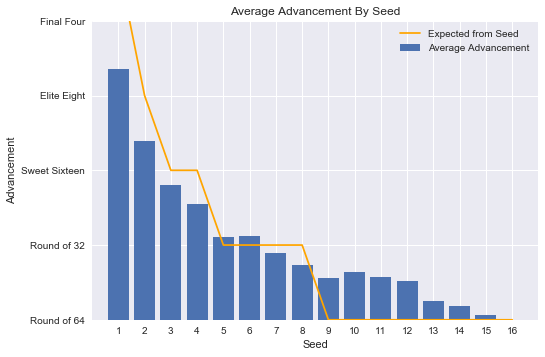

In [5]:
# plot average wins by seed
plt.bar(seed_summaries.index, seed_summaries["Average Wins"])
tick_locations = seed_summaries.index
plt.title("Average Advancement By Seed")
plt.ylabel("Advancement")
plt.xlabel("Seed")
plt.xticks(tick_locations, seed_summaries.index)
yticks = ["Round of 64","Round of 32","Sweet Sixteen","Elite Eight","Final Four"]
plt.yticks(range(5),yticks)
plt.ylim(0,4)
plt.xlim(0,17)

seed_expectations = [4.75,3,2,2,1,1,1,1,0,0,0,0,0,0,0,0]
plt.plot(tick_locations, seed_expectations, c="orange")

plt.legend(["Expected from Seed","Average Advancement"])
plt.show()

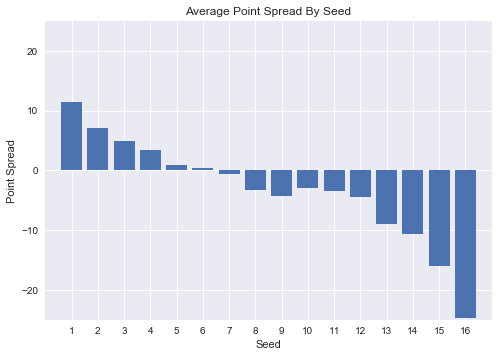

In [6]:
plt.bar(seed_summaries.index, seed_summaries["Average Point Spread"])
tick_locations = seed_summaries.index
plt.title("Average Point Spread By Seed")
plt.ylabel("Point Spread")
plt.xlabel("Seed")
plt.xticks(tick_locations, seed_summaries.index)
plt.ylim(-25,25)
plt.xlim(0,17)
plt.show()

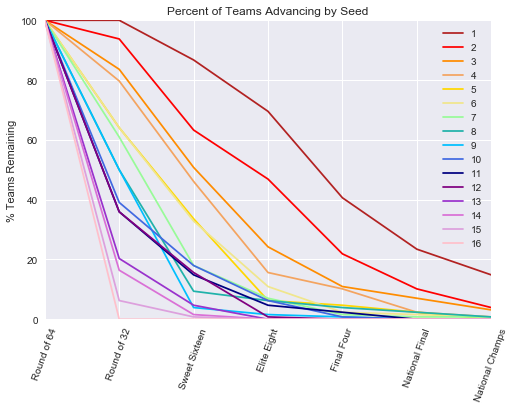

In [7]:
# plot teams remaining by round for each seed
teams_remaining_by_seed = []

def get_wins_in_round(seed_data,tourney_round,seed_count):
    try:
        round_win_pct = (seed_data[tourney_round]/seed_count)*100
    except KeyError:
        round_win_pct = 0
    return round_win_pct

rounds = ["Round of 64","Round of 32", "Sweet Sixteen", "Elite Eight", "National Semifinals", "National Championship"]

for seed in seed_summaries["Wins by Round"]:
    teams_remaining = []
    teams_remaining.append(100)
    for tourney_round in rounds:
        round_win_pct = get_wins_in_round(seed,tourney_round,seed_count)
        teams_remaining.append(round_win_pct)
    teams_remaining_by_seed.append(teams_remaining)
    
colors = ["firebrick","red","darkorange","sandybrown","gold","khaki","palegreen","lightseagreen","deepskyblue","royalblue",
         "navy","purple","darkorchid","orchid","plum","pink"]
    
for i in range(len(teams_remaining_by_seed)):
    plt.plot(teams_remaining_by_seed[i], c=colors[i])
    
xticks = ["Round of 64","Round of 32","Sweet Sixteen","Elite Eight","Final Four","National Final","National Champs"]
tick_locations = range(len(xticks))
plt.title("Percent of Teams Advancing by Seed")
plt.ylabel("% Teams Remaining")
plt.xticks(tick_locations, xticks, rotation=70)
plt.ylim(0,100)
plt.xlim(0,6)
plt.legend(range(1,17))
plt.show()

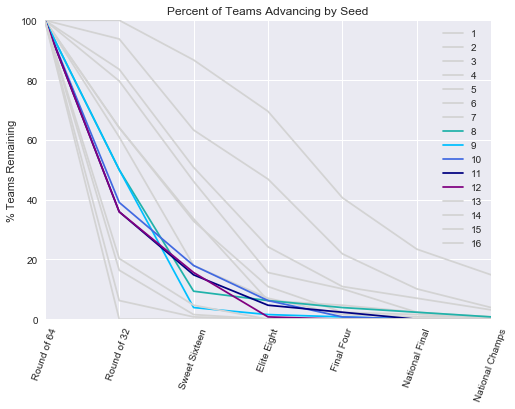

In [8]:
# highlight interesting seeds
    
colors = ["lightgray","lightgray","lightgray","lightgray","lightgray","lightgray","lightgray","lightseagreen",
          "deepskyblue","royalblue","navy","purple","lightgray","lightgray","lightgray","lightgray"]

for i in range(len(teams_remaining_by_seed)):
    plt.plot(teams_remaining_by_seed[i], c=colors[i])

xticks = ["Round of 64","Round of 32","Sweet Sixteen","Elite Eight","Final Four","National Final","National Champs"]
tick_locations = range(len(xticks))
plt.title("Percent of Teams Advancing by Seed")
plt.ylabel("% Teams Remaining")
plt.xticks(tick_locations, xticks, rotation=70)
plt.ylim(0,100)
plt.xlim(0,6)
plt.legend(range(1,17))
plt.show()

In [9]:
# group seeds into subsets

years = []

for date in no_play_ins["date"]:
    year = date.split("-")[0]
    years.append(year)

no_play_ins["year"] = years
    
upper_seeds = no_play_ins.loc[(no_play_ins["seed"] == 1) 
                        | (no_play_ins["seed"] == 2) 
                        | (no_play_ins["seed"] == 3) 
                        | (no_play_ins["seed"] == 4), :]

mid_upper_seeds = no_play_ins.loc[(no_play_ins["seed"] == 5) 
                        | (no_play_ins["seed"] == 6) 
                        | (no_play_ins["seed"] == 7) 
                        | (no_play_ins["seed"] == 8), :]

mid_lower_seeds = no_play_ins.loc[(no_play_ins["seed"] == 9) 
                        | (no_play_ins["seed"] == 10) 
                        | (no_play_ins["seed"] == 11) 
                        | (no_play_ins["seed"] == 12), :]

lower_seeds = no_play_ins.loc[(no_play_ins["seed"] == 13) 
                        | (no_play_ins["seed"] == 14) 
                        | (no_play_ins["seed"] == 15) 
                        | (no_play_ins["seed"] == 16), :] 

C:\Users\Matt\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [10]:
# get win counts for each team in the seed subsets

high_seeds_by_year = upper_seeds.groupby("year")
mid_high_seeds_by_year = mid_upper_seeds.groupby("year")
mid_low_seeds_by_year = mid_lower_seeds.groupby("year")
low_seeds_by_year = lower_seeds.groupby("year")

def summarize_win_counts(seeds_by_year):

    win_totals = []
    win_counts = []

    for name, year in seeds_by_year:
        teams = year.groupby("team")
        for team_name, team in teams:
            wins = team["win"].sum()
            win_totals.append(wins)

    for i in range(7):
        count = win_totals.count(i)
        win_counts.append(count)

    return win_counts

high_seed_win_counts = summarize_win_counts(high_seeds_by_year)
mid_high_seed_win_counts = summarize_win_counts(mid_high_seeds_by_year)
mid_low_seed_win_counts = summarize_win_counts(mid_low_seeds_by_year)
low_seed_win_counts = summarize_win_counts(low_seeds_by_year)

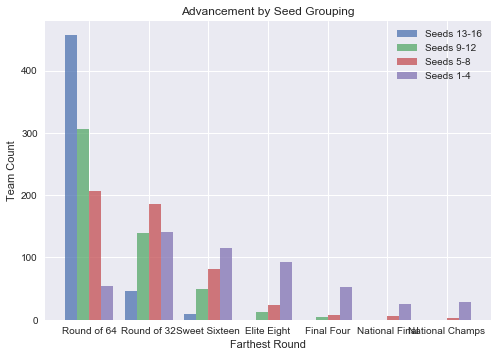

In [11]:
# Compare 

seed_groupings = [low_seed_win_counts,
                  mid_low_seed_win_counts,
                  mid_high_seed_win_counts,
                  high_seed_win_counts,
                  ]

win_range = range(7)
xticks = ["Round of 64","Round of 32","Sweet Sixteen","Elite Eight","Final Four","National Final","National Champs"]
tick_locations = win_range
plt.title("Advancement by Seed Grouping")
plt.ylabel("Team Count")
plt.xlabel("Farthest Round")
plt.xticks(tick_locations, xticks)

bar_adjustments = [-0.3,-0.1,0.1,0.3]
all_bar_locations = []

for adjustment in bar_adjustments:
    bar_locations = []
    for location in win_range:
        bar_locations.append(location + adjustment)
    all_bar_locations.append(bar_locations)
    
for i in range(4):
    plt.bar(all_bar_locations[i], seed_groupings[i], width= 0.2, alpha=0.75)

plt.legend(["Seeds 13-16","Seeds 9-12","Seeds 5-8","Seeds 1-4"])
plt.show()

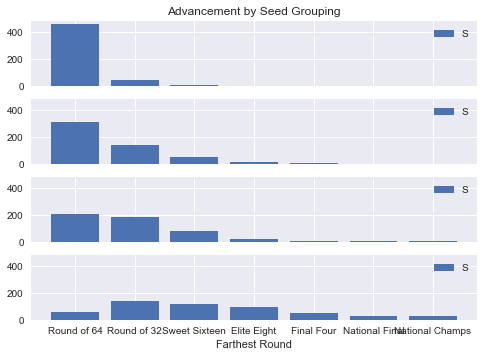

In [34]:
seed_groupings = [low_seed_win_counts,
                  mid_low_seed_win_counts,
                  mid_high_seed_win_counts,
                  high_seed_win_counts,
                  ]

win_range = range(7)
f, (ax1, ax2, ax3, ax4) = plt.subplots(4, sharex=True, sharey=True)
ax1.bar(win_range, low_seed_win_counts)
ax1.legend("Seeds 13-16")
ax1.set_title("Advancement by Seed Grouping")
ax2.bar(win_range, mid_low_seed_win_counts)
ax2.legend("Seeds 9-12")
ax3.bar(win_range, mid_high_seed_win_counts)
ax3.legend("Seeds 5-8")
ax4.bar(win_range, high_seed_win_counts)
ax4.legend("Seeds 1-4")

xticks = ["Round of 64","Round of 32","Sweet Sixteen","Elite Eight","Final Four","National Final","National Champs"]
tick_locations = win_range
plt.xlabel("Farthest Round")
plt.xticks(tick_locations, xticks)

plt.show()